In [11]:
# Performing survival analysis using Kaplan Meier method

import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

df=pd.read_csv("../1_data/private/preprocessed_data.csv")

mask = (df['Visit_yr'] >= 2017) 
df = df.loc[mask]



C:\Users\hjagirdar\AppData\Local\Temp\ipykernel_12780\2978159056.py:15: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../1_data/private/preprocessed_data.csv")


In [12]:
#Survival Analysis

#KAPLAN MEIER CURVE BASED ON DEFERRAL TYPE

#whole blood donation based on deferral type (hgb deferral, other, completed donation - no deferral)

#create new dataframe with only WB donations

#df_wb = df.drop(df[df.don_proc_imputed != "WB"].index)

#create fitter objects for the 3 types
kmf_hgb= KaplanMeierFitter()
kmf_other=KaplanMeierFitter()
kmf_comp=KaplanMeierFitter()

#divide data into 3 groups based on deferral type
hgb_def=df.query("OUTCOME_TYPE == 'low hgb'")
other_def=df.query("OUTCOME_TYPE == 'other deferral'")
comp_don=df.query("OUTCOME_TYPE == 'completed'")




Text(0.5, 1.0, 'Cumulative density function of time to return')

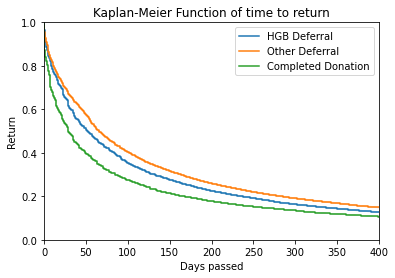

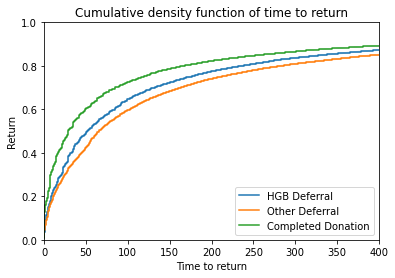

In [13]:
#fiiting the curves
kmf_hgb.fit(durations =  hgb_def["time_to_return"],event_observed = hgb_def["CENSORED"] ,label="HGB Deferral")
kmf_other.fit(durations =  other_def["time_to_return"],event_observed = other_def["CENSORED"], label="Other Deferral")
kmf_comp.fit(durations =  comp_don["time_to_return"],event_observed = comp_don["CENSORED"], label="Completed Donation")

#plot survival function data
kmf_hgb.plot()
kmf_other.plot()
kmf_comp.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Kaplan-Meier Function of time to return")

#plot cumulative density functions
plt.figure()
kmf_hgb.plot_cumulative_density()
kmf_other.plot_cumulative_density()
kmf_comp.plot_cumulative_density()
plt.axis([0, 400, 0, 1])
plt.ylabel("Return")
plt.xlabel("Time to return")
plt.title("Cumulative density function of time to return")

Text(0.5, 1.0, 'Kaplan-Meier Function of time to return for repeat donors')

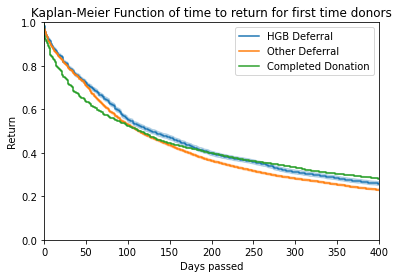

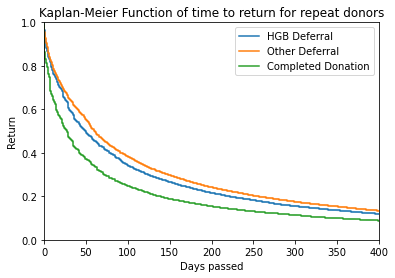

In [14]:
# split by first time and repeat

#create fitter objects for the 3 types for first
kmf_hgb_first= KaplanMeierFitter()
kmf_other_first=KaplanMeierFitter()
kmf_comp_first=KaplanMeierFitter()

#create fitter objects for the 3 types for repeat
kmf_hgb_repeat= KaplanMeierFitter()
kmf_other_repeat=KaplanMeierFitter()
kmf_comp_repeat=KaplanMeierFitter()

#didvide data into first and repeat
first = df.query("first_time == 1")
repeat =df.query("first_time == 0")

#divide data into 3 groups based on deferral type for first
hgb_def_first=first.query("OUTCOME_TYPE == 'low hgb'")
other_def_first=first.query("OUTCOME_TYPE == 'other deferral'")
comp_don_first=first.query("OUTCOME_TYPE == 'completed'")

#divide data into 3 groups based on deferral type for repeat
hgb_def_repeat=repeat.query("OUTCOME_TYPE == 'low hgb'")
other_def_repeat=repeat.query("OUTCOME_TYPE == 'other deferral'")
comp_don_repeat=repeat.query("OUTCOME_TYPE == 'completed'")
 
 # for first time donors
#fiiting the curves
kmf_hgb_first.fit(durations =  hgb_def_first["time_to_return"],event_observed = hgb_def_first["CENSORED"] ,label="HGB Deferral")
kmf_other_first.fit(durations =  other_def_first["time_to_return"],event_observed = other_def_first["CENSORED"], label="Other Deferral")
kmf_comp_first.fit(durations =  comp_don_first["time_to_return"],event_observed = comp_don_first["CENSORED"], label="Completed Donation")

#plot survival function data
kmf_hgb_first.plot()
kmf_other_first.plot()
kmf_comp_first.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Kaplan-Meier Function of time to return for first time donors")

#for repeat donors
#fiiting the curves
kmf_hgb_repeat.fit(durations =  hgb_def_repeat["time_to_return"],event_observed = hgb_def_repeat["CENSORED"] ,label="HGB Deferral")
kmf_other_repeat.fit(durations =  other_def_repeat["time_to_return"],event_observed = other_def_repeat["CENSORED"], label="Other Deferral")
kmf_comp_repeat.fit(durations =  comp_don_repeat["time_to_return"],event_observed = comp_don_repeat["CENSORED"], label="Completed Donation")

#plot survival function data
plt.figure()
kmf_hgb_repeat.plot()
kmf_other_repeat.plot()
kmf_comp_repeat.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Kaplan-Meier Function of time to return for repeat donors")



In [15]:
# KM fixed, mobile - for the 3 categories

#Kaplen Meier return after donation at fixed site and after donation at mobile site

#creating fitter objects

#for fixed
kmf_hgb_f= KaplanMeierFitter()
kmf_other_f=KaplanMeierFitter()
kmf_comp_f=KaplanMeierFitter()

#for mobile
kmf_hgb_m= KaplanMeierFitter()
kmf_other_m=KaplanMeierFitter()
kmf_comp_m=KaplanMeierFitter()

#divide data respectively

fixed= df.query("Fixed_mobile== 1")
mobile= df.query("Fixed_mobile == 0")

hgb_def_f=fixed.query("OUTCOME_TYPE == 'low hgb'")
other_def_f=fixed.query("OUTCOME_TYPE == 'other deferral'")
comp_don_f=fixed.query("OUTCOME_TYPE == 'completed'")

hgb_def_m=mobile.query("OUTCOME_TYPE == 'low hgb'")
other_def_m=mobile.query("OUTCOME_TYPE == 'other deferral'")
comp_don_m=mobile.query("OUTCOME_TYPE == 'completed'")

71.0
     HGB Deferral_lower_0.95  HGB Deferral_upper_0.95
0.5                     71.0                     72.0
29.0
     HGB Deferral_lower_0.95  HGB Deferral_upper_0.95
0.5                     29.0                     30.0
50.0
     Completed Donation_lower_0.95  Completed Donation_upper_0.95
0.5                           50.0                           50.0
16.0
     Completed Donation_lower_0.95  Completed Donation_upper_0.95
0.5                           16.0                           16.0


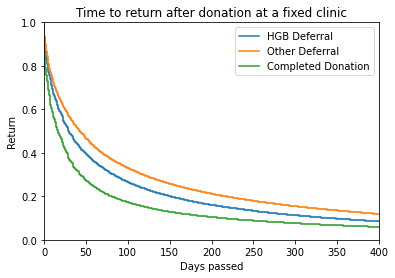

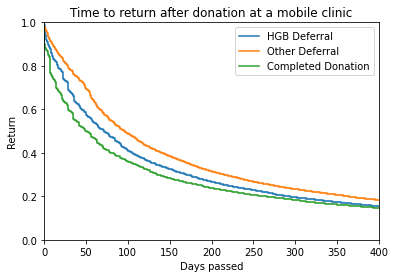

In [18]:
from lifelines.utils import median_survival_times

#fit the curves for fixed
kmf_hgb_f.fit(durations =  hgb_def_f["time_to_return"],event_observed = hgb_def_f["CENSORED"] ,label="HGB Deferral")
kmf_other_f.fit(durations =  other_def_f["time_to_return"],event_observed = other_def_f["CENSORED"], label="Other Deferral")
kmf_comp_f.fit(durations =  comp_don_f["time_to_return"],event_observed = comp_don_f["CENSORED"], label="Completed Donation")

#fit curves for mobile
kmf_hgb_m.fit(durations =  hgb_def_m["time_to_return"],event_observed = hgb_def_m["CENSORED"] ,label="HGB Deferral")
kmf_other_m.fit(durations =  other_def_m["time_to_return"],event_observed = other_def_m["CENSORED"], label="Other Deferral")
kmf_comp_m.fit(durations =  comp_don_m["time_to_return"],event_observed = comp_don_m["CENSORED"], label="Completed Donation")

#plot figures:

kmf_hgb_f.plot()
kmf_other_f.plot()
kmf_comp_f.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Time to return after donation at a fixed clinic")

plt.figure()
kmf_hgb_m.plot()
kmf_other_m.plot()
kmf_comp_m.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Time to return after donation at a mobile clinic")


print(kmf_hgb_m.median_survival_time_)
print(median_survival_times(kmf_hgb_m.confidence_interval_))
      
print(kmf_hgb_f.median_survival_time_)
print(median_survival_times(kmf_hgb_f.confidence_interval_))
            
print(kmf_comp_m.median_survival_time_)
print(median_survival_times(kmf_comp_m.confidence_interval_))
      
print(kmf_comp_f.median_survival_time_)
print(median_survival_times(kmf_comp_f.confidence_interval_))

134.0
107.0
129.0
43.0


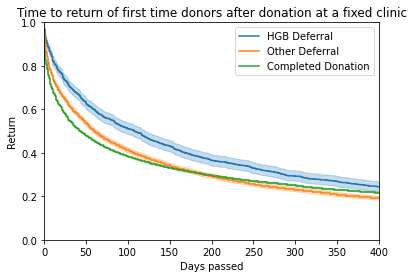

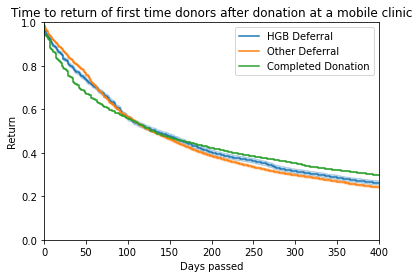

In [8]:
# split by first time and repeat 
#first time
#for fixed 
kmf_hgb_f_first= KaplanMeierFitter()
kmf_other_f_first=KaplanMeierFitter()
kmf_comp_f_first=KaplanMeierFitter()

#for mobile
kmf_hgb_m_first= KaplanMeierFitter()
kmf_other_m_first=KaplanMeierFitter()
kmf_comp_m_first=KaplanMeierFitter()

#divide data respectively
fixed_first= first.query("Fixed_mobile== 1")
mobile_first= first.query("Fixed_mobile == 0")

hgb_def_f_first=fixed_first.query("OUTCOME_TYPE == 'low hgb'")
other_def_f_first=fixed_first.query("OUTCOME_TYPE == 'other deferral'")
comp_don_f_first=fixed_first.query("OUTCOME_TYPE == 'completed'")

hgb_def_m_first=mobile_first.query("OUTCOME_TYPE == 'low hgb'")
other_def_m_first=mobile_first.query("OUTCOME_TYPE == 'other deferral'")
comp_don_m_first=mobile_first.query("OUTCOME_TYPE == 'completed'")

#fit the curves for fixed
kmf_hgb_f_first.fit(durations =  hgb_def_f_first["time_to_return"],event_observed = hgb_def_f_first["CENSORED"] ,label="HGB Deferral")
kmf_other_f_first.fit(durations =  other_def_f_first["time_to_return"],event_observed = other_def_f_first["CENSORED"], label="Other Deferral")
kmf_comp_f_first.fit(durations =  comp_don_f_first["time_to_return"],event_observed = comp_don_f_first["CENSORED"], label="Completed Donation")

#fit curves for mobile
kmf_hgb_m_first.fit(durations =  hgb_def_m_first["time_to_return"],event_observed = hgb_def_m_first["CENSORED"] ,label="HGB Deferral")
kmf_other_m_first.fit(durations =  other_def_m_first["time_to_return"],event_observed = other_def_m_first["CENSORED"], label="Other Deferral")
kmf_comp_m_first.fit(durations =  comp_don_m_first["time_to_return"],event_observed = comp_don_m_first["CENSORED"], label="Completed Donation")

#plot figures:

kmf_hgb_f_first.plot()
kmf_other_f_first.plot()
kmf_comp_f_first.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Time to return of first time donors after donation at a fixed clinic")

plt.figure()
kmf_hgb_m_first.plot()
kmf_other_m_first.plot()
kmf_comp_m_first.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("Time to return of first time donors after donation at a mobile clinic")

print(kmf_hgb_m_first.median_survival_time_)
print(kmf_hgb_f_first.median_survival_time_)
print(kmf_comp_m_first.median_survival_time_)
print(kmf_comp_f_first.median_survival_time_)

Text(0.5, 1.0, 'After Completed Donation')

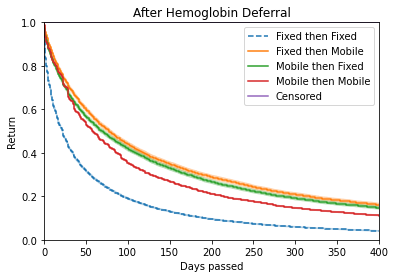

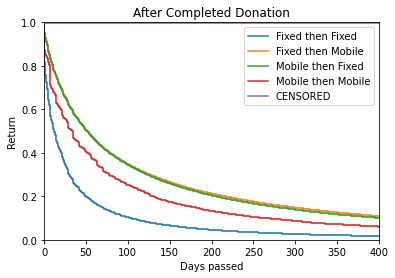

In [9]:
#KM on fixed-mobile pattern

ffhgb= hgb_def.query("fixed_mobile_pattern == 'FF'")
fmhgb= hgb_def.query("fixed_mobile_pattern == 'FM'")
mfhgb= hgb_def.query("fixed_mobile_pattern == 'MF'")
mmhgb= hgb_def.query("fixed_mobile_pattern == 'MM'")
lasthgb= hgb_def.query("fixed_mobile_pattern == 'last'")

ffcomp=comp_don.query("fixed_mobile_pattern == 'FF'")
fmcomp=comp_don.query("fixed_mobile_pattern == 'FM'")
mfcomp=comp_don.query("fixed_mobile_pattern == 'MF'")
mmcomp=comp_don.query("fixed_mobile_pattern == 'MM'")
lastcomp=comp_don.query("fixed_mobile_pattern == 'last'")

kmfhgb_ff= KaplanMeierFitter()
kmfhgb_fm= KaplanMeierFitter()
kmfhgb_mf= KaplanMeierFitter()
kmfhgb_mm= KaplanMeierFitter()
kmfhgb_last= KaplanMeierFitter()

kmfcomp_ff= KaplanMeierFitter()
kmfcomp_fm= KaplanMeierFitter()
kmfcomp_mf= KaplanMeierFitter()
kmfcomp_mm= KaplanMeierFitter()
kmfcomp_last= KaplanMeierFitter()

kmfhgb_ff.fit(durations =  ffhgb["time_to_return"],event_observed = ffhgb["CENSORED"] ,label="Fixed then Fixed")
kmfhgb_fm.fit(durations =  fmhgb["time_to_return"],event_observed = fmhgb["CENSORED"], label="Fixed then Mobile")
kmfhgb_mf.fit(durations =  mfhgb["time_to_return"],event_observed = mfhgb["CENSORED"] ,label="Mobile then Fixed")
kmfhgb_mm.fit(durations =  mmhgb["time_to_return"],event_observed = mmhgb["CENSORED"] ,label="Mobile then Mobile")
kmfhgb_last.fit(durations =  lasthgb["time_to_return"],event_observed = lasthgb["CENSORED"] ,label="Censored")

kmfcomp_ff.fit(durations =  ffcomp["time_to_return"],event_observed = ffcomp["CENSORED"] ,label="Fixed then Fixed")
kmfcomp_fm.fit(durations =  fmcomp["time_to_return"],event_observed = fmcomp["CENSORED"], label="Fixed then Mobile")
kmfcomp_mf.fit(durations =  mfcomp["time_to_return"],event_observed = mfcomp["CENSORED"] ,label="Mobile then Fixed")
kmfcomp_mm.fit(durations =  mmcomp["time_to_return"],event_observed = mmcomp["CENSORED"] ,label="Mobile then Mobile")
kmfcomp_last.fit(durations =  lastcomp["time_to_return"],event_observed = lastcomp["CENSORED"] ,label="CENSORED")

plt.figure()
kmfhgb_ff.plot(linestyle='dashed')
kmfhgb_fm.plot()
kmfhgb_mf.plot()
kmfhgb_mm.plot()
kmfhgb_last.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("After Hemoglobin Deferral")

plt.figure()
kmfcomp_ff.plot()
kmfcomp_fm.plot()
kmfcomp_mf.plot()
kmfcomp_mm.plot()
kmfcomp_last.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("After Completed Donation")


Text(0.5, 1.0, 'First time donors:After Completed Donation')

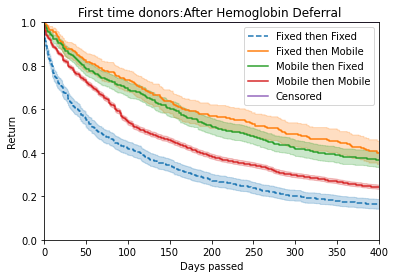

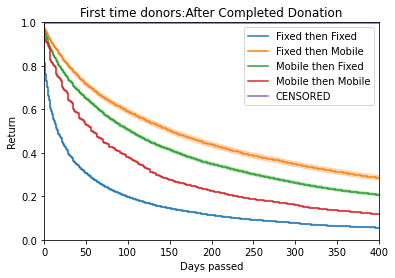

In [10]:
# for first time donors
# KM on fixed-mobile pattern

ffhgb_first= hgb_def_first.query("fixed_mobile_pattern == 'FF'")
fmhgb_first= hgb_def_first.query("fixed_mobile_pattern == 'FM'")
mfhgb_first= hgb_def_first.query("fixed_mobile_pattern == 'MF'")
mmhgb_first= hgb_def_first.query("fixed_mobile_pattern == 'MM'")
lasthgb_first= hgb_def_first.query("fixed_mobile_pattern == 'last'")

ffcomp_first=comp_don_first.query("fixed_mobile_pattern == 'FF'")
fmcomp_first=comp_don_first.query("fixed_mobile_pattern == 'FM'")
mfcomp_first=comp_don_first.query("fixed_mobile_pattern == 'MF'")
mmcomp_first=comp_don_first.query("fixed_mobile_pattern == 'MM'")
lastcomp_first=comp_don_first.query("fixed_mobile_pattern == 'last'")

kmfhgb_ff_first= KaplanMeierFitter()
kmfhgb_fm_first= KaplanMeierFitter()
kmfhgb_mf_first= KaplanMeierFitter()
kmfhgb_mm_first= KaplanMeierFitter()
kmfhgb_last_first= KaplanMeierFitter()

kmfcomp_ff_first= KaplanMeierFitter()
kmfcomp_fm_first= KaplanMeierFitter()
kmfcomp_mf_first= KaplanMeierFitter()
kmfcomp_mm_first= KaplanMeierFitter()
kmfcomp_last_first= KaplanMeierFitter()

kmfhgb_ff_first.fit(durations =  ffhgb_first["time_to_return"],event_observed = ffhgb_first["CENSORED"] ,label="Fixed then Fixed")
kmfhgb_fm_first.fit(durations =  fmhgb_first["time_to_return"],event_observed = fmhgb_first["CENSORED"], label="Fixed then Mobile")
kmfhgb_mf_first.fit(durations =  mfhgb_first["time_to_return"],event_observed = mfhgb_first["CENSORED"] ,label="Mobile then Fixed")
kmfhgb_mm_first.fit(durations =  mmhgb_first["time_to_return"],event_observed = mmhgb_first["CENSORED"] ,label="Mobile then Mobile")
kmfhgb_last_first.fit(durations =  lasthgb_first["time_to_return"],event_observed = lasthgb_first["CENSORED"] ,label="Censored")

kmfcomp_ff_first.fit(durations =  ffcomp_first["time_to_return"],event_observed = ffcomp_first["CENSORED"] ,label="Fixed then Fixed")
kmfcomp_fm_first.fit(durations =  fmcomp_first["time_to_return"],event_observed = fmcomp_first["CENSORED"], label="Fixed then Mobile")
kmfcomp_mf_first.fit(durations =  mfcomp_first["time_to_return"],event_observed = mfcomp_first["CENSORED"] ,label="Mobile then Fixed")
kmfcomp_mm_first.fit(durations =  mmcomp_first["time_to_return"],event_observed = mmcomp_first["CENSORED"] ,label="Mobile then Mobile")
kmfcomp_last_first.fit(durations =  lastcomp_first["time_to_return"],event_observed = lastcomp_first["CENSORED"] ,label="CENSORED")

plt.figure()
kmfhgb_ff_first.plot(linestyle='dashed')
kmfhgb_fm_first.plot()
kmfhgb_mf_first.plot()
kmfhgb_mm_first.plot()
kmfhgb_last_first.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("First time donors:After Hemoglobin Deferral ")

plt.figure()
kmfcomp_ff_first.plot()
kmfcomp_fm_first.plot()
kmfcomp_mf_first.plot()
kmfcomp_mm_first.plot()
kmfcomp_last_first.plot()
plt.axis([0, 400, 0, 1])
plt.xlabel("Days passed")
plt.ylabel("Return")
plt.title("First time donors:After Completed Donation")


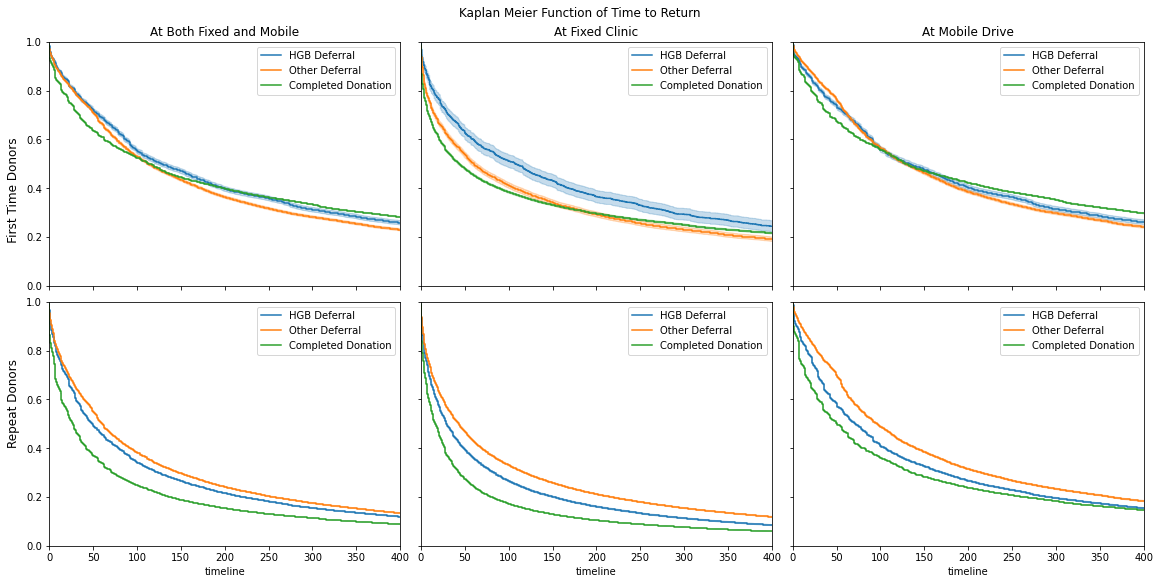

In [40]:

# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16, 8), layout='constrained', sharex=True, sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
plt.axis([0, 400, 0, 1])
fig.suptitle('Kaplan Meier Function of Time to Return')
         
kmf_hgb_first.plot(ax=ax1)
kmf_other_first.plot(ax=ax1)
kmf_comp_first.plot(ax=ax1)
ax1.set_title('At Both Fixed and Mobile')

kmf_hgb_f_first.plot(ax=ax2)
kmf_other_f_first.plot(ax=ax2)
kmf_comp_f_first.plot(ax=ax2)
ax2.set_title('At Fixed Clinic')

kmf_hgb_m_first.plot(ax=ax3)
kmf_other_m_first.plot(ax=ax3)
kmf_comp_m_first.plot(ax=ax3)
ax3.set_title('At Mobile Drive')

kmf_hgb_repeat.plot(ax=ax4)
kmf_other_repeat.plot(ax=ax4)
kmf_comp_repeat.plot(ax=ax4)

kmf_hgb_f.plot(ax=ax5)
kmf_other_f.plot(ax=ax5)
kmf_comp_f.plot(ax=ax5)

kmf_hgb_m.plot(ax=ax6)
kmf_other_m.plot(ax=ax6)
kmf_comp_m.plot(ax=ax6)

#fig.supxlabel('Days Passed')
fig.supylabel('Repeat Donors                              First Time Donors')

#fig.legend(legend_handles, legend_labels, loc='upper right')

plt.show()

<Figure size 432x288 with 0 Axes>

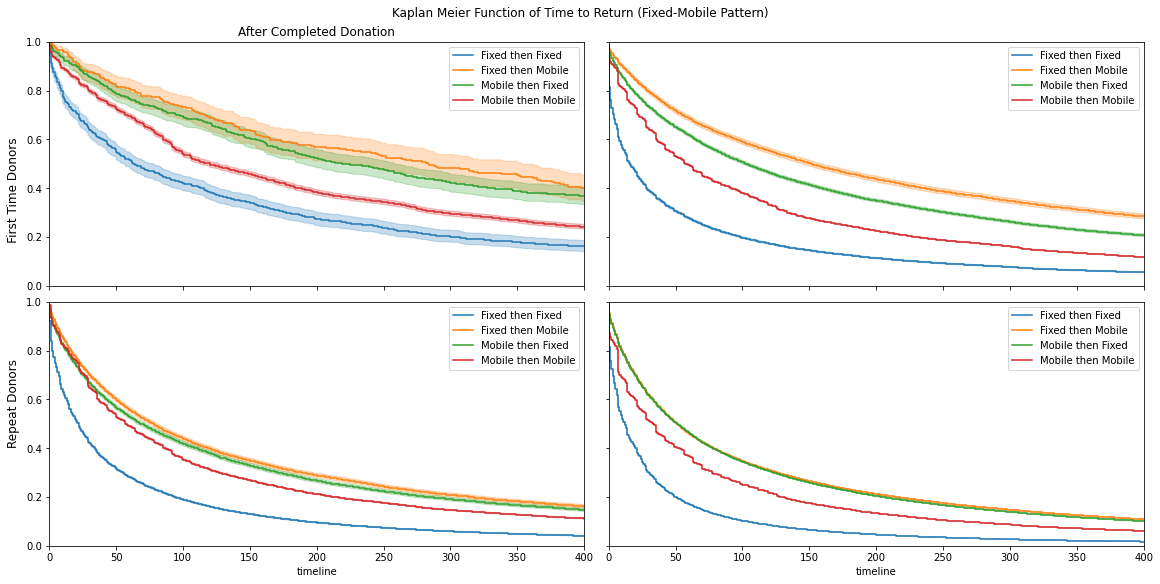

In [42]:
# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16, 8), layout='constrained', sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = axes.flatten()
plt.axis([0, 400, 0, 1])
fig.suptitle('Kaplan Meier Function of Time to Return (Fixed-Mobile Pattern)')

kmfhgb_ff_first.plot(ax=ax1)
kmfhgb_fm_first.plot(ax=ax1)
kmfhgb_mf_first.plot(ax=ax1)
kmfhgb_mm_first.plot(ax=ax1)
#kmfhgb_last_first.plot(ax=ax1)
ax1.set_title('After Hemoglobin Deferral')

kmfcomp_ff_first.plot(ax=ax2)
kmfcomp_fm_first.plot(ax=ax2)
kmfcomp_mf_first.plot(ax=ax2)
kmfcomp_mm_first.plot(ax=ax2)
#kmfcomp_last_first.plot(ax=ax1)
ax1.set_title('After Completed Donation')

kmfhgb_ff.plot(ax=ax3)
kmfhgb_fm.plot(ax=ax3)
kmfhgb_mf.plot(ax=ax3)
kmfhgb_mm.plot(ax=ax3)
#kmfhgb_last.plot()

kmfcomp_ff.plot(ax=ax4)
kmfcomp_fm.plot(ax=ax4)
kmfcomp_mf.plot(ax=ax4)
kmfcomp_mm.plot(ax=ax4)
#kmfcomp_last.plot()

fig.supylabel('Repeat Donors                              First Time Donors')

#fig.legend(legend_handles, legend_labels, loc='upper right')

plt.show()